In [ ]:
# HuggingFace timm examples

### timm is a library containing SOTA computer vision models, layers, utilities, optimizers, schedulers, data-loaders, augmentations, and training/evaluation scripts.

In [ ]:
!pip install timm

In [3]:
# Load a pretrained model
import timm

m = timm.create_model("mobilenetv3_large_100", pretrained=True)

m.eval()

m.pretrained_cfg


{'url': 'https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/mobilenetv3_large_100_ra-f55367f5.pth',
 'hf_hub_id': 'timm/mobilenetv3_large_100.ra_in1k',
 'architecture': 'mobilenetv3_large_100',
 'tag': 'ra_in1k',
 'custom_load': False,
 'input_size': (3, 224, 224),
 'fixed_input_size': False,
 'interpolation': 'bicubic',
 'crop_pct': 0.875,
 'crop_mode': 'center',
 'mean': (0.485, 0.456, 0.406),
 'std': (0.229, 0.224, 0.225),
 'num_classes': 1000,
 'pool_size': (7, 7),
 'first_conv': 'conv_stem',
 'classifier': 'classifier'}

In [2]:
# List models with pretrained weights

import timm
from pprint import pprint

model_names = timm.list_models(pretrained=True)

pprint(model_names)

['bat_resnext26ts.ch_in1k',
 'beit_base_patch16_224.in22k_ft_in22k',
 'beit_base_patch16_224.in22k_ft_in22k_in1k',
 'beit_base_patch16_384.in22k_ft_in22k_in1k',
 'beit_large_patch16_224.in22k_ft_in22k',
 'beit_large_patch16_224.in22k_ft_in22k_in1k',
 'beit_large_patch16_384.in22k_ft_in22k_in1k',
 'beit_large_patch16_512.in22k_ft_in22k_in1k',
 'beitv2_base_patch16_224.in1k_ft_in1k',
 'beitv2_base_patch16_224.in1k_ft_in22k',
 'beitv2_base_patch16_224.in1k_ft_in22k_in1k',
 'beitv2_large_patch16_224.in1k_ft_in1k',
 'beitv2_large_patch16_224.in1k_ft_in22k',
 'beitv2_large_patch16_224.in1k_ft_in22k_in1k',
 'botnet26t_256.c1_in1k',
 'caformer_b36.sail_in1k',
 'caformer_b36.sail_in1k_384',
 'caformer_b36.sail_in22k',
 'caformer_b36.sail_in22k_ft_in1k',
 'caformer_b36.sail_in22k_ft_in1k_384',
 'caformer_m36.sail_in1k',
 'caformer_m36.sail_in1k_384',
 'caformer_m36.sail_in22k',
 'caformer_m36.sail_in22k_ft_in1k',
 'caformer_m36.sail_in22k_ft_in1k_384',
 'caformer_s18.sail_in1k',
 'caformer_s18.s

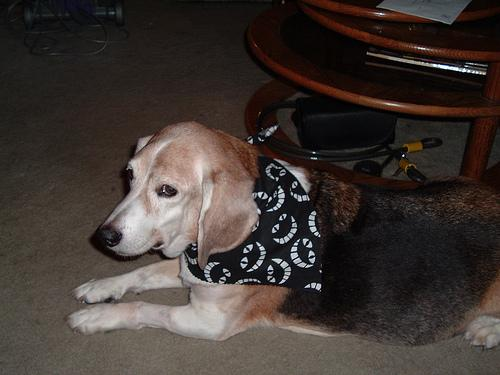

In [5]:
# An inference example

import requests
from PIL import Image
from io import BytesIO

url = 'https://datasets-server.huggingface.co/assets/imagenet-1k/--/default/test/12/image/image.jpg'
image = Image.open(requests.get(url, stream=True).raw)
image

In [7]:
# Create the model and transforms
model = timm.create_model("mobilenetv3_large_100", pretrained=True).eval()
transform = timm.data.create_transform(
    **timm.data.resolve_data_config(model.pretrained_cfg)
)

image_tensor = transform(image)

image_tensor.shape


torch.Size([3, 224, 224])

In [9]:
# Parse the image tensors to model for prediction
output = model(image_tensor.unsqueeze(0))
output.shape

torch.Size([1, 1000])

In [11]:
# Apply softmax to output
import torch

probabilities = torch.nn.functional.softmax(output[0], dim=0)
probabilities.shape

torch.Size([1000])

In [12]:
# Find the top 5 predicted class indexes and values
values, indices = torch.topk(probabilities, 5)
indices

tensor([162, 166, 161, 164, 167])

In [13]:
# Check the imagenet labels for the top index, that's what the model predicted
IMAGENET_1k_URL = 'https://storage.googleapis.com/bit_models/ilsvrc2012_wordnet_lemmas.txt'
IMAGENET_1k_LABELS = requests.get(IMAGENET_1k_URL).text.strip().split('\n')

[{'label': IMAGENET_1k_LABELS[idx], 'value': val.item()} for val, idx in zip(values, indices)]

[{'label': 'beagle', 'value': 0.8444967865943909},
 {'label': 'Walker_hound, Walker_foxhound', 'value': 0.038777630776166916},
 {'label': 'basset, basset_hound', 'value': 0.02546093799173832},
 {'label': 'bluetick', 'value': 0.01014547236263752},
 {'label': 'English_foxhound', 'value': 0.007152201142162085}]